In [173]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape

In [174]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# To predict the key attributes needed for determining whether high sales or not

In [175]:
df["Sales"].max()

16.27

In [176]:
df["Sales"].min()

0.0

Assuming a sales above 7 as high and otherwise as low

In [177]:
cls = []
for i in range(0,df.shape[0]):
    if df["Sales"][i]>=7:
        cls.append("High")
    else:
        cls.append("Low")
df["Class"]=cls
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [178]:
df["Class"].value_counts()

High    216
Low     184
Name: Class, dtype: int64

In [179]:
lblen = LabelEncoder()
df["ShelveLoc"] = lblen.fit_transform(df["ShelveLoc"])
df["Urban"] = lblen.fit_transform(df["Urban"])
df["US"] = lblen.fit_transform(df["US"])
df["Class"] = lblen.fit_transform(df["Class"])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [180]:
x=df.iloc[:,1:11]
y=df.iloc[:,11]

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.3)

In [182]:
model= RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [183]:
model.base_estimator_.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(330.22265625, 520.95, 'Price <= 105.5\ngini = 0.494\nsamples = 280\nvalue = [155, 125]\nclass = High'),
 Text(127.875, 475.65000000000003, 'ShelveLoc <= 0.5\ngini = 0.359\nsamples = 98\nvalue = [75, 23]\nclass = High'),
 Text(69.75, 430.35, 'Income <= 95.5\ngini = 0.496\nsamples = 22\nvalue = [10, 12]\nclass = Low'),
 Text(46.5, 385.05, 'Age <= 34.5\ngini = 0.415\nsamples = 17\nvalue = [5, 12]\nclass = Low'),
 Text(23.25, 339.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = High'),
 Text(69.75, 339.75, 'CompPrice <= 121.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]\nclass = Low'),
 Text(46.5, 294.45, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Low'),
 Text(93.0, 294.45, 'Education <= 16.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = High'),
 Text(69.75, 249.14999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = High'),
 Text(116.25, 249.14999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Low'),
 Text(93.0, 385.05, 'gini = 0.0\nsamples

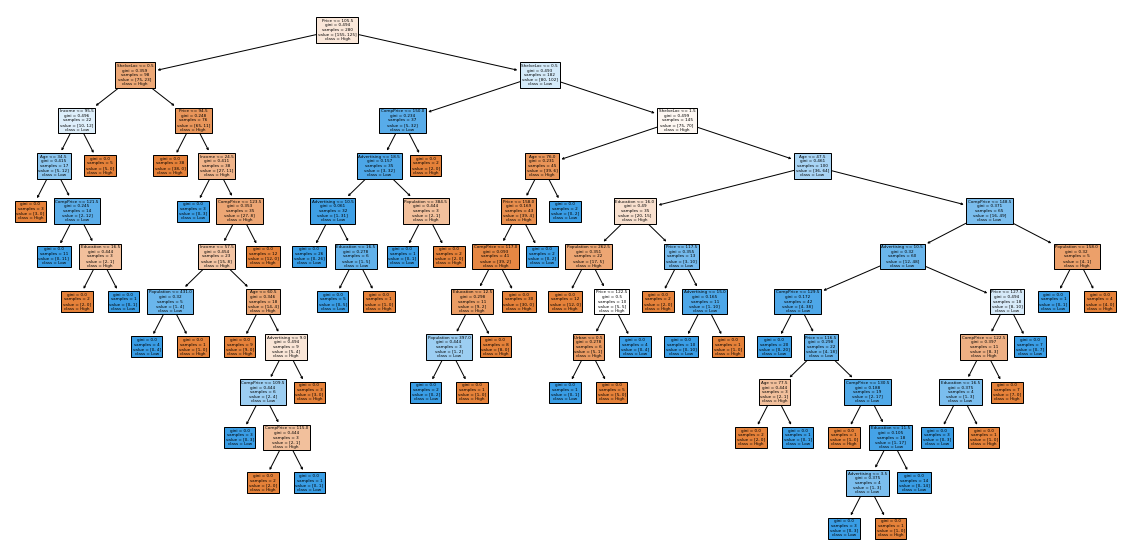

In [184]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['High','Low','Medium']
plt.figure(figsize=(20,10))

tree.plot_tree(model.base_estimator_,feature_names=fn,class_names=cn,filled=True)

# From Random Forest Classifier we can deduce that the most important attributes are : Shelf Location at stores ,Price, Income, Competitor Price, Advertising cost, Age, Population, Education

# To predict average sales

In [185]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [194]:
def min_max_scaler(i):
    data= pd.DataFrame(i)
    df_norm=  (data-data.min())/(data.max()-data.min())
    return df_norm

In [196]:
df = min_max_scaler(df)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,0.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0,0.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0,0.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0,0.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,1.0


In [197]:
x=df.iloc[:,1:11]
y=df.iloc[:,0]

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.3)

In [199]:
modelreg = RandomForestRegressor(n_estimators=5,max_depth=8,random_state=42,min_samples_split=3,max_features=10)
modelreg.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=10, min_samples_split=3,
                      n_estimators=5, random_state=42)

In [221]:
y_pred = modelreg.predict(x_test)
y_pred.mean()

0.4548250466344516

In [222]:
1-mape(y_test,y_pred)

0.7734142162884778

# Hence using Random forest classifier we can predict the average sales to be  7.4 with a 77.34% accuracy